Notebook modified from https://github.com/openai/baselines/blob/master/docs/viz/viz.ipynb to for Breakout results

## Loading results and plotting using matplotlib
Bаselines provides helper functions to load the summaries of the results as pandas dataframes. 
For instance, the following:

In [26]:
from baselines.common import plot_util as pu
# **** SET BASE DIRECTORY HERE ****
# This cell will output a warning, but it can be ignored for the scope of this notebook
results_dir = '~/rl/breakout/'
results = pu.load_results(results_dir + 'logs/Breakout') 

/home/ubuntu/baselines/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


will search for all folders with baselines-compatible results in ~/logs/cartpole-ppo and subfolders and return a list of `Result` objects. Each `Result` object is a named tuple with the following fields:

  * dirname: str - name of the folder from which data was loaded
  
  * metadata: dict) - dictionary with various metadata (read from metadata.json file)

  * progress: pandas.DataFrame - tabular data saved by logger as a pandas dataframe. Available if csv is in logger formats.

  * monitor: pandas.DataFrame - raw episode data (length, episode reward, timestamp). Available if environment wrapped with Monitor wrapper
  
Thus, a learning curve from a single run can be plotted as follows (note the cumulative sum trick to get convert lengths of the episodes into number of time steps taken so far)
 

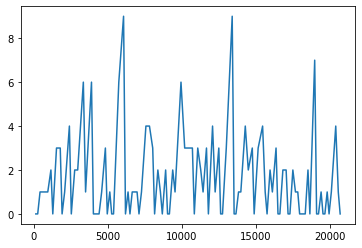

In [7]:
import matplotlib.pyplot as plt
import numpy as np
r = results[0]
plt.plot(np.cumsum(r.monitor.l), r.monitor.r)

The raw learning curve from a single run can be very noisy. To smoothen it and analyze if any learning actually takes place, we can use `plot_util.smooth()` function:

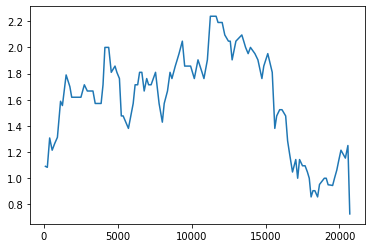

In [8]:
plt.plot(np.cumsum(r.monitor.l), pu.smooth(r.monitor.r, radius=10))

Similar curve can be obtained by using logger summaries (instead of raw episode data in monitor.csv):


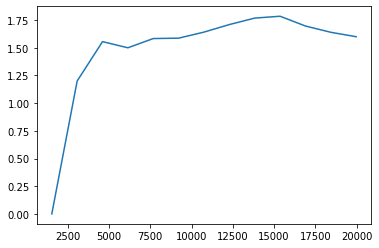

In [25]:
plt.plot(r.progress['misc/total_timesteps'], r.progress.eprewmean)

Note, however, that raw episode data is stored by the Monitor wrapper, and hence looks similar for all algorithms, whereas progress data is handled by the algorithm itself, and hence can vary (column names, type of data available) between algorithms.